# C&n IPR

This notebook shows how the  C&n IPR can be derived and calculated from well test data. The following well test data is provided.

| WHP (psi) | BHP (psi) | Qo (stb/day) | Qg (MMscf/day) | Qw (stb/day) |
|-----------|-----------|--------------|----------------|--------------|
| 1500.0    | 2794.3    | 84.3         | 84.3           | 84.3         |
| 1300.0    | 2719.0    | 86.5         | 86.5           | 86.5         |

## Mathematical Formulation

The general equation for the C&n IPR is:

$$
q = C(\bar{p}^2-p_{wf}^2)^n
$$


Where, $\bar{p}$ is the reservoir pressure, $P_{wf}$ is the flowing bottom-hole pressure, and $C$ and $n$ are constants determined from well test data.

The constants $C$ and $n$ are specific to each well and are calculated based on well test data. The $C$ parameter is analogous to a productivity index while the $n$ exponent signals the type of flow ($n=1$ for a Darcy flow and $n=1/2$ for a completely turbulent flow). The equation is an empirical relationship and is used to estimate the production rate of a well for a given bottom-hole pressure.

## Analytic Solve for C&n

To calculate the constants $C$ and $n$ for the C&n Inflow Performance Relationship (IPR) model using well test data, you can use two sets of data points that include the flow rate $q$, the reservoir pressure $\bar{p}$ and the flowing bottom-hole pressure $P_{wf}$. These data points allow you to set up two equations with two unknowns $C$ and $n$ which can be solved simultaneously.

Assuming you have two data points: $q_1, P_{wf_1}$ and $q_2$, $P_{wf_2}$, you can set up the following equations based on the IPR formula:

$$q_1 = C(\bar{p}^2-P_{wf_1}^2)^n$$
$$q_2 = C(\bar{p}^2-P_{wf_2}^2)^n$$

These equations can be rearranged to solve for $C$ and $n$. Let's proceed with solving these equations:

1. Rearrange each equation to solve for $C$:

$$C = \frac{q_1}{(\bar{p}^2-P_{wf_1}^2)^n}$$
$$C = \frac{q_2}{(\bar{p}^2-P_{wf_2}^2)^n}$$

2. Since both expressions equal $C$, set them equal to each other and solve for $n$:

$$\frac{q_1}{(\bar{p}^2-P_{wf_1}^2)^n} = \frac{q_2}{(\bar{p}^2-P_{wf_2}^2)^n}$$
$$\frac{q_1}{q_2} = \frac{(\bar{p}^2-P_{wf_1}^2)^n}{(\bar{p}^2-P_{wf_2}^2)^n} $$
$$\ln\left(\frac{q_1}{q_2}\right) = \ln\left(\frac{(\bar{p}^2-P_{wf_1}^2)^n}{(\bar{p}^2-P_{wf_2}^2)^n}\right) $$
$$\ln\left(\frac{q_1}{q_2}\right) = n\ln(\bar{p}^2-P_{wf_1}^2)-n\ln(\bar{p}^2-P_{wf_2}^2)$$
$$ n = \frac{\ln\left(\frac{q_1}{q_2}\right)}{\ln(\bar{p}^2-P_{wf_1}^2)-n\ln(\bar{p}^2-P_{wf_2}^2)}$$

These formulas allow you to calculate $C$ & $n$ when you know the values of $q_1$, $q_2$, $\bar{p}$, $P_{wf_1}$, and $P_{wf_2}$.

Here's a Python function that implements these calculations:

In [1]:
import math

def calculate_C_n(q1, P_wf1, q2, P_wf2, p_bar):
    """
    Calculate constants C and n from well test data.

    :param q1: Flow rate for the first data point
    :param P_wf1: Flowing bottom-hole pressure for the first data point
    :param q2: Flow rate for the second data point
    :param P_wf2: Flowing bottom-hole pressure for the second data point
    :param p_bar: Average reservoir pressure
    :return: Constants C and n
    """
    # Calculate n
    n = math.log(q1 / q2) / (math.log(p_bar**2 - P_wf1**2) - math.log(p_bar**2 - P_wf2**2))

    # Calculate C
    C = q1 / ((p_bar**2 - P_wf1**2)**n)

    return C, n

Now let's use the two test points given above using the gas rates and bottom-hole flowing pressures:

In [2]:

# Example usage with your data points
q1 = 84.3255  # Example flow rate for the first data point
P_wf1 = 2794.3  # Example bottom-hole pressure for the first data point
q2 = 86.4931  # Example flow rate for the second data point
P_wf2 = 2719.0 # Example bottom-hole pressure for the second data point
p_bar = 5300  # Example average reservoir pressure

C, n = calculate_C_n(q1, P_wf1, q2, P_wf2, p_bar)
print(f"Calculated C: {C}, n: {n}")


Calculated C: 5.9320019841656e-08, n: 1.252582714576216


Here is the Python code that calculates the rate given all parameters:

In [3]:
def calculate_flow_rate(C, n, p_bar, p_wf):
    """
    Calculate the flow rate using the given equation.

    :param C: Constant C determined from well test data
    :param n: Exponent n determined from well test data
    :param p_bar: Average reservoir pressure
    :param p_wf: Flowing bottom-hole pressure
    :return: Calculated flow rate q
    """
    q = C * (p_bar**2 - p_wf**2)**n
    return q

Now let's use this function to calculate a full IPR curve.

In [4]:
import numpy as np

pwf = np.linspace(0,p_bar,100)

q = [calculate_flow_rate(C, n, p_bar, x) for x in pwf]

Now let's print the IPR

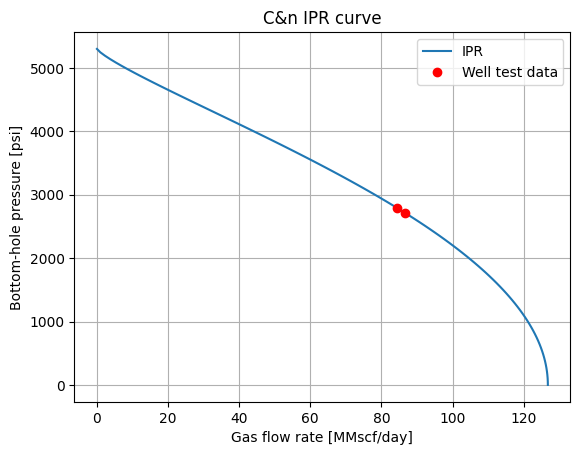

In [5]:
import matplotlib.pyplot as plt

plt.plot(q,pwf,label='IPR')
plt.plot([q1,q2],[P_wf1,P_wf2],'ro',label='Well test data')
plt.xlabel('Gas flow rate [MMscf/day]')
plt.ylabel('Bottom-hole pressure [psi]')
plt.title('C&n IPR curve')
plt.legend()
plt.grid(True)

## Absolute Open Flow (AOF) Calculation

The Absolute Open Flow (AOF) is calculated with the pressure of 0 (zero) psi.

In [6]:
AOF = calculate_flow_rate(C, n, p_bar, 0)
print(f'AOF={AOF} MMscf/day')

AOF=126.80268357038035 MMscf/day
